# Implicit method:

Write a code to solve the 1-d linear advection equation using the implicit discretisation scheme:

$$u_i^{j+1} =u_i^j - c\frac{\Delta t}{\Delta x}(u_{i}^{j+1} - u_{i-1}^{j+1} )$$


on the domain $[0,1]$ with $c=1$ and periodic boundary conditions. For initial conditions, try a top-hat function:

$$ 
u(x,0)= 
     \begin{cases}
       0, & x < 1/3\\
       1, & 1/3 \leq x \leq 2/3,\\
       0, & x > 2/3,\\
     \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Create our computational domain:

In [2]:
# Let's create our grid:
xmin = 0. 
xmax = 1.

# Number of points on the grid
nx = 101

# Limits for the grid -> BCs
x_low  = 1
x_high = nx - 1 

# Step size in x
delta_x = (xmax - xmin)/(nx - 1)

# Vector for x
x = np.arange(xmin, xmax + delta_x, delta_x)

print(x_low, x_high)

1 100


## 2. Create empy arrays to store the slns:

In [3]:
# Vector to store the solution
u   = np.zeros(nx, dtype=np.float64) # For double precision
u_0 = np.zeros(nx, dtype=np.float64)

print(u_0.shape, u.shape)

(101,) (101,)


### 3. Define the ICs:

In [4]:
# Initial conditions
def top_hat(x):
    
    if (1./3. <= x <= 2./3.):
        return 1.0
    else:
        return 0.0
    
# Evaluate the function
# Empty list for the y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

print(x.shape, y.shape)

# Assign initial conditions
u_0 = y.copy()

(101,) (101,)


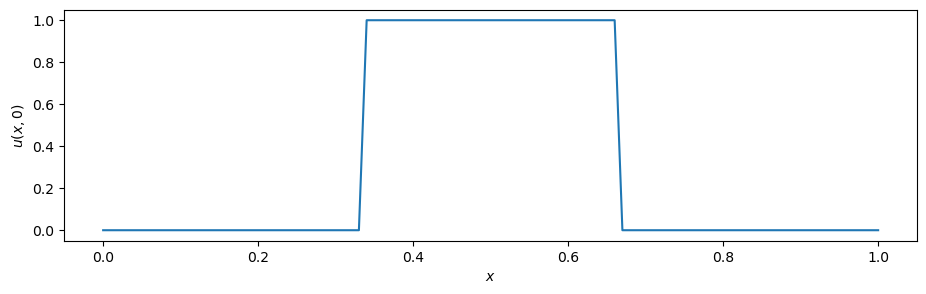

In [5]:
# Plotting the initial conditions 

plt.figure(figsize = (11,3))
plt.plot(x, u_0)

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,0)$")
plt.show()


## 4. Domain discretisation:

In [10]:
# Fill in the BCs
u = y.copy()

# We just need to define one side
u[0] = u[x_high]

# Time discretisation
speed = 1. # c constant
t_period = (xmax - xmin)/speed
cfl = 0.1

# Time step
delta_t = cfl*delta_x/speed


## 5. Calculate the sln based on matrix algebra

In [11]:
# Empty Matrix 
m = np.zeros((nx - 1, nx - 1), dtype=np.float64)
print(m.shape)

(100, 100)


In [12]:
# While method
t = 0.0

while t < t_period:
    
    # Fill up the matrix diag.
    for i in range(nx - 1):
        
        # Main diagonal
        m[i, i]   = 1. + cfl
        
        # Neg diagonal
        m[i, i-1] = -cfl
    
    #print(m)
    
    # Define RHS of the linear eq.
    b = u[x_low:x_high+1]
    #print(b.shape)
    
    # Alternatives:
    #M_inv = np.linalg.inv(M)
    #u_new = M_inv@b
    
    # Find the new state vector by solving the linear systems of eqs.
    u_new = np.linalg.solve(m, b)
    
    # Update the numerical solution with the new array
    u[x_low:x_high+1] = u_new[:]
    
    # Periodic BCs
    u[0] = u[x_high]
    
    # Advance in time
    t += delta_t

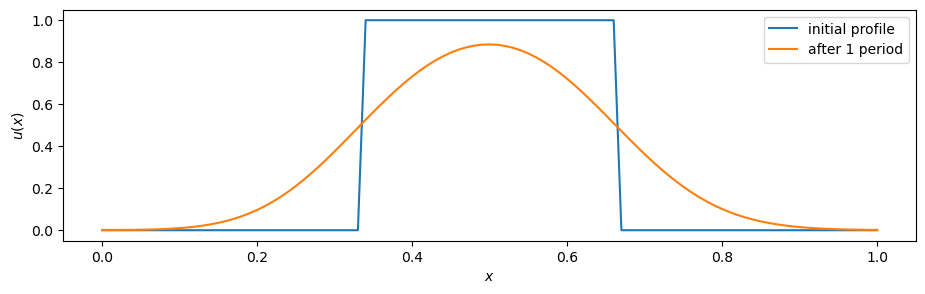

In [13]:
# Plotting the initial conditions 

plt.figure(figsize = (11,3))
plt.plot(x, u_0, label = "initial profile")
plt.plot(x, u  , label = "after 1 period")

plt.xlabel(r"$x$")
plt.ylabel(r"$u(x)$")

plt.legend(loc = 1)
plt.show()


## 6. Define function for the implicit method:

In [14]:
def implicit_method(cfl_input, t_factor):
    
    """
    This is a function to calculate the implicit sln based on:
    Inputs: cfl_input -> cfl
            t_factor  -> factor in front of 1 period
    Output: u_sln
    """
    
    # Fill in the BCs
    u = y.copy()

    # We just need to define one side
    u[0] = u[x_high]

    # Time discretisation
    speed = 1.
    t_period = t_factor*(xmax - xmin)/speed
    cfl = cfl_input

    # Time step
    delta_t = cfl*delta_x/speed

    # Empty Matrix 
    m = np.zeros((nx - 1, nx - 1), dtype=np.float64)

    # While method
    t = 0.0

    while t < t_period:

        # Fill up the matrix diag.
        for i in range(nx - 1):
            
            # Main m diagonal
            m[i, i]   = 1 + cfl
            
            # Negative diagonal
            m[i, i-1] = -cfl

        # Define RHS of the linear eq.
        b = u[x_low:x_high+1]
     
        # Find the new state vector by solving the linear systems of eqs.
        u_new = np.linalg.solve(m, b)

        # Update the numerical solution with the new array
        u[x_low:x_high+1] = u_new[:]

        # Periodic BCs
        u[0] = u[x_high]

        # Advance in time
        t += delta_t
        
    return u
    

## 7. CFL-dependence analysis:

In [15]:
# Call the function:

factor = 1. # 1 period

# For cfl = 1, Period = 1
cfl1 = 1.
s_tf1 = implicit_method(cfl1, factor)

# For cfl = 0.9, Period = 1
cfl2 = 0.9
s_tf2 = implicit_method(cfl2, factor)

# For cfl = 0.5, Period = 1
cfl3 = 0.5
s_tf3 = implicit_method(cfl3, factor)

# For cfl = 0.1, Period = 1
cfl4 = 0.1
s_tf4 = implicit_method(cfl4, factor)

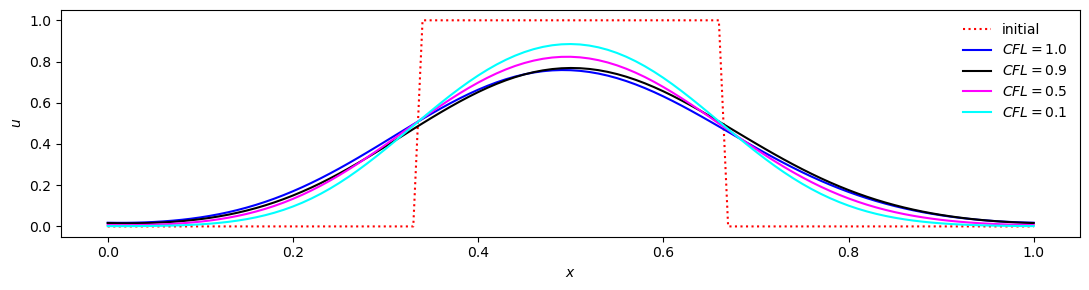

In [16]:
# Plot the initial profile

plt.figure(figsize=(11,3))
plt.plot(x, u_0, ls=":", color = 'red', label="initial")

plt.plot(x, s_tf1, color = 'blue', label=r"$CFL = {}$".format(cfl1))
plt.plot(x, s_tf2, color = 'black', label=r"$CFL = {}$".format(cfl2))
plt.plot(x, s_tf3, color = 'magenta', label=r"$CFL = {}$".format(cfl3))
plt.plot(x, s_tf4, color = 'cyan', label=r"$CFL = {}$".format(cfl4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

## 8. Resolution analysis:

In [17]:
# Let's create our grid:
xmin = 0. 
xmax = 1.

# Number of points on the grid
nx = 501

# Limits for the grid
x_low  = 1
x_high = nx - 1 

# Physical coordinates
delta_x = (xmax - xmin)/(nx - 1)

# Vector for x
x = np.arange(xmin, xmax + delta_x, delta_x)

# Vector to store the solution
u   = np.zeros(nx, dtype=np.float64) # For doble precision
u_0 = np.zeros(nx, dtype=np.float64)

# Evaluate the function
# Empty list for the y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

#print(x.shape, y.shape)

# Assign initial conditions

u_0 = y.copy()

In [18]:
# Call the function:

factor = 1.

# For CFL = 1, Period = 1
CFL1 = 1.
s_tf1 = implicit_method(CFL1, factor)

# For CFL = 0.9, Period = 1
CFL2 = 0.9
s_tf2 = implicit_method(CFL2, factor)

# For CFL = 0.5, Period = 1
CFL3 = 0.5
s_tf3 = implicit_method(CFL3, factor)

# For CFL = 0.1, Period = 1
CFL4 = 0.1
s_tf4 = implicit_method(CFL4, factor)


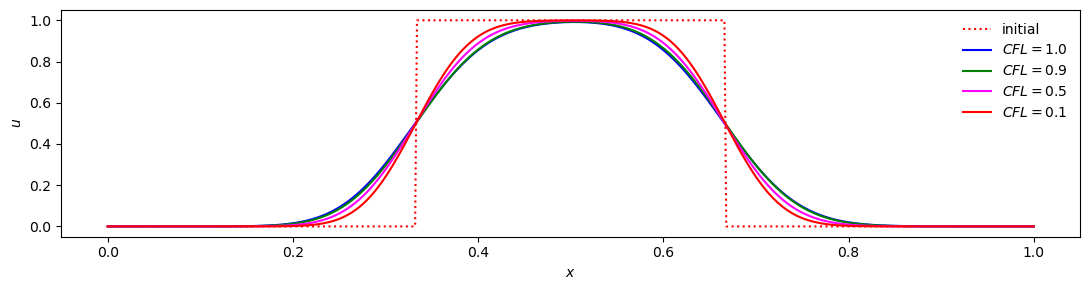

In [19]:
# Plot the initial profile

plt.figure(figsize=(11,3))
plt.plot(x, u_0, ls=":", color = 'red', label="initial")

plt.plot(x, s_tf1, color = 'blue', label=r"$CFL = {}$".format(CFL1))
plt.plot(x, s_tf2, color = 'green', label=r"$CFL = {}$".format(CFL2))
plt.plot(x, s_tf3, color = 'magenta', label=r"$CFL = {}$".format(CFL3))
plt.plot(x, s_tf4, color = 'red', label=r"$CFL = {}$".format(CFL4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

In [20]:
# Let's create our grid:
xmin = 0. 
xmax = 1.

# Number of points on the grid
nx = 1001

# Limits for the grid
x_low  = 1
x_high = nx - 1 

# Physical coordinates
delta_x = (xmax - xmin)/(nx - 1)

# Vector for x
x = np.arange(xmin, xmax + delta_x, delta_x)

# Vector to store the solution
u   = np.zeros(nx, dtype=np.float64) # For doble precision
u_0 = np.zeros(nx, dtype=np.float64)

# Evaluate the function
# Empty list for the y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

#print(x.shape, y.shape)

# Assign initial conditions

u_0 = y.copy()

In [21]:
# Call the function:

factor = 1.

# For CFL = 1, Period = 1
CFL1 = 1.
s_tf1 = implicit_method(CFL1, factor)

# For CFL = 0.9, Period = 1
CFL2 = 0.9
s_tf2 = implicit_method(CFL2, factor)

# For CFL = 0.5, Period = 1
CFL3 = 0.5
s_tf3 = implicit_method(CFL3, factor)

# For CFL = 0.1, Period = 1
CFL4 = 0.1
s_tf4 = implicit_method(CFL4, factor)


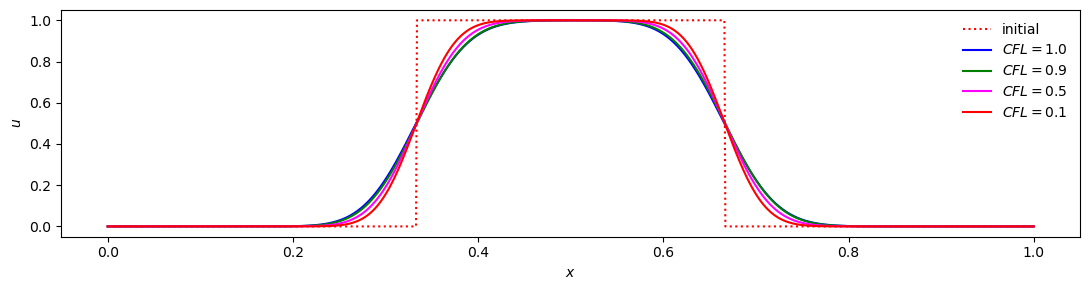

In [22]:
# Plot the initial profile

plt.figure(figsize=(11,3))
plt.plot(x, u_0, ls=":", color = 'red', label="initial")

plt.plot(x, s_tf1, color = 'blue', label=r"$CFL = {}$".format(CFL1))
plt.plot(x, s_tf2, color = 'green', label=r"$CFL = {}$".format(CFL2))
plt.plot(x, s_tf3, color = 'magenta', label=r"$CFL = {}$".format(CFL3))
plt.plot(x, s_tf4, color = 'red', label=r"$CFL = {}$".format(CFL4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()

## 9. Fixed CFL number and different times:

In [26]:
# Let's create our grid:
xmin = 0. 
xmax = 1.

# Number of points on the grid
nx = 501

# Limits for the grid
x_low  = 1
x_high = nx - 1 

# Physical coordinates
delta_x = (xmax - xmin)/(nx - 1)

# Vector for x
x = np.arange(xmin, xmax + delta_x, delta_x)

# Vector to store the solution
u   = np.zeros(nx, dtype=np.float64) # For doble precision
u_0 = np.zeros(nx, dtype=np.float64)

# Evaluate the function
# Empty list for the y axis
y = []

for j in range(len(x)):
    
    y.append(top_hat(x[j]))

y = np.array(y)

#print(x.shape, y.shape)

# Assign initial conditions

u_0 = y.copy()

In [27]:
# Call the function:

# For CFL = 0.1, Period = 1
CFL = 0.1
factor1 = 1.
s_tf1 = implicit_method(CFL, factor1)

# For CFL = 0.1, Period = 2
factor2 = 2.
s_tf2 = implicit_method(CFL, factor2)

# For CFL = 0.1, Period = 3
factor3 = 3.
s_tf3 = implicit_method(CFL, factor3)

# For CFL = 0.1, Period = 4
factor4 = 4.
s_tf4 = implicit_method(CFL, factor4)

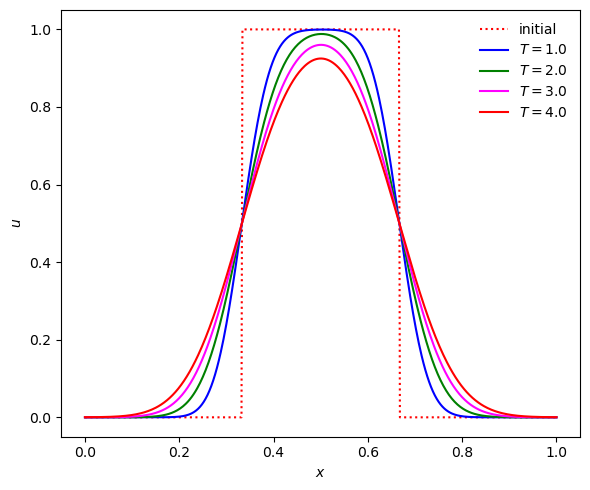

In [28]:
# Plot the initial profile

plt.figure(figsize=(6,5))
plt.plot(x, u_0, ls=":", color = 'red', label="initial")

plt.plot(x, s_tf1, color = 'blue', label=r"$T = {}$".format(factor1))
plt.plot(x, s_tf2, color = 'green', label=r"$T = {}$".format(factor2))
plt.plot(x, s_tf3, color = 'magenta', label=r"$T = {}$".format(factor3))
plt.plot(x, s_tf4, color = 'red', label=r"$T = {}$".format(factor4))

plt.xlabel(r"$x$")
plt.ylabel(r"$u$")

plt.legend(frameon=False, loc="best")

plt.tight_layout()

plt.show()